## Part 1: PCA Relatedness

In [ ]:
%%bash
awk '{gsub(/chrXVI/, "16");  
      gsub(/chrXV/, "15"); 
      gsub(/chrXIV/, "14");
      gsub(/chrXIII/, "13"); 
      gsub(/chrXII/, "12"); 
      gsub(/chrXI/, "11"); 
      gsub(/chrX/, "10"); 
      gsub(/chrIX/, "9"); 
      gsub(/chrVIII/, "8");
      gsub(/chrVII/, "7"); 
      gsub(/chrVI/, "6"); 
      gsub(/chrV/, "5");
      gsub(/chrIV/, "4"); 
      gsub(/chrIII/, "3"); 
      gsub(/chrII/, "2");
      gsub(/chrI/, "1");
      gsub(/chrM/, "M");
      print;}' /Users/cmdb/qbb2020-answers/QUANT2020/data/lab3/Data_For_Assignment/BYxRM_segs_saccer3.bam.simplified.vcf > replace.vcf

 # loop though and replace roman numberals with numbers... besides m


In [62]:
%%bash
head -n 30 replace.vcf

##fileformat=VCFv4.2
##fileDate=20170921
##source=freeBayes v1.1.0-dirty
##reference=genome/sacCer3.fa
##contig=<ID=1,length=230218>
##contig=<ID=2,length=813184>
##contig=<ID=3,length=316620>
##contig=<ID=4,length=1531933>
##contig=<ID=9,length=439888>
##contig=<ID=5,length=576874>
##contig=<ID=6,length=270161>
##contig=<ID=7,length=1090940>
##contig=<ID=8,length=562643>
##contig=<ID=10,length=745751>
##contig=<ID=11,length=666816>
##contig=<ID=12,length=1078177>
##contig=<ID=13,length=924431>
##contig=<ID=14,length=784333>
##contig=<ID=15,length=1091291>
##contig=<ID=16,length=948066>
##contig=<ID=M,length=85779>
##phasing=none
##commandline="freebayes -f genome/sacCer3.fa BYxRM_segs_saccer3.bam --use-best-n-alleles 4 --min-alternate-count 20 --region 1:0-10000"
##filter="QUAL > 50000"
##INFO=<ID=AF,Number=A,Type=Float,Description="Estimated allele frequency in the range (0,1]">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=DP,Number=1,Type=Integer,Descrip

In [160]:
%%plink
plink \
  --vcf replace.vcf \
  --pca \
  --mind \ 
  # Run PCA

UsageError: Cell magic `%%plink` not found.


In [103]:
%%bash
head -n 30 /Users/cmdb/qbb2020-answers/QUANT2020/data/lab3/Data_For_Assignment/BYxRM_PhenoData.txt

	Cadmium_Chloride	Caffeine	Calcium_Chloride	Cisplatin	Cobalt_Chloride	Congo_red	Copper	Cycloheximide	Diamide	E6_Berbamine	Ethanol	Formamide	Galactose	Hydrogen_Peroxide	Hydroquinone	Hydroxyurea	Indoleacetic_Acid	Lactate	Lactose	Lithium_Chloride	Magnesium_Chloride	Magnesium_Sulfate	Maltose	Mannose	Menadione	Neomycin	Paraquat	Raffinose	SDS	Sorbitol	Trehalose	Tunicamycin	x4-Hydroxybenzaldehyde	x4NQO	x5-Fluorocytosine	x5-Fluorouracil	x6-Azauracil	Xylose	YNB	YNB:ph3	YNB:ph8	YPD	YPD:15C	YPD:37C	YPD:4C	Zeocin
A01_01	-7.32351970578731	0.279992827000249	0.313118165836545	1.65817907082079	-1.60444210190495	5.84161725611811	-4.13094977046224	0.821226166664529	3.62260156257758	-0.378746805086589	-0.6449544101999	0.736772421684145	1.46869950807288	4.25247880427656	-0.439429122584143	0.471260934436784	-0.502023574403563	-0.0196386553492135	-0.520403819717771	-3.04250228422253	-0.239535833991348	3.24339670861968	-3.94506679134117	2.13462934930907	2.02778180052776	-10.930132784538	1.5331378908103	-0.76

# modify Phenotype File

In [110]:
linechange = open('Data_For_Assignment/BYxRM_PhenoData.txt', 'r') # Modify Phenotype file header and column #1
change = open('Data_For_Assignment/BYxRM_PhenoDataCHANGE.txt', 'w')

lbl = linechange.readlines() #data save
linechange.close()

for line in lbl: 
    if "Caffeine" in line: # modify header
        line = "FID" + "\t" + "IID" + line #recombine column and 
        
    else: #all the other lines
        cat = line.split("_") # split by _ 
        line = cat[0] + "\t" + cat[1] # put back together
    change.write(line)
change.close()

In [111]:
%%bash
head -n 30 Data_For_Assignment/BYxRM_PhenoDataCHANGE.txt

FID	IID	Cadmium_Chloride	Caffeine	Calcium_Chloride	Cisplatin	Cobalt_Chloride	Congo_red	Copper	Cycloheximide	Diamide	E6_Berbamine	Ethanol	Formamide	Galactose	Hydrogen_Peroxide	Hydroquinone	Hydroxyurea	Indoleacetic_Acid	Lactate	Lactose	Lithium_Chloride	Magnesium_Chloride	Magnesium_Sulfate	Maltose	Mannose	Menadione	Neomycin	Paraquat	Raffinose	SDS	Sorbitol	Trehalose	Tunicamycin	x4-Hydroxybenzaldehyde	x4NQO	x5-Fluorocytosine	x5-Fluorouracil	x6-Azauracil	Xylose	YNB	YNB:ph3	YNB:ph8	YPD	YPD:15C	YPD:37C	YPD:4C	Zeocin
A01	01	-7.32351970578731	0.279992827000249	0.313118165836545	1.65817907082079	-1.60444210190495	5.84161725611811	-4.13094977046224	0.821226166664529	3.62260156257758	-0.378746805086589	-0.6449544101999	0.736772421684145	1.46869950807288	4.25247880427656	-0.439429122584143	0.471260934436784	-0.502023574403563	-0.0196386553492135	-0.520403819717771	-3.04250228422253	-0.239535833991348	3.24339670861968	-3.94506679134117	2.13462934930907	2.02778180052776	-10.930132784538	1.533137890810

In [47]:
%%bash
head -n 30 plink.eigenvec

A01 01 0.0293777 0.0187452 0.0221747 0.0445282 -0.0017888 -0.0508647 0.0217531 0.0296259 -0.0158424 -0.0578691 0.0265217 0.0168406 -0.00624554 -0.00694047 -0.0188674 0.00540447 -0.0150763 0.0331427 -0.0241464 -0.0319716
A01 02 -0.0178869 -0.0153446 -0.00963119 -0.0680471 0.0592403 -0.0397113 -0.0294007 -0.072011 0.00333541 -0.0133644 0.0160004 0.0328675 0.0069063 0.00238534 -0.00589107 0.0270326 0.0180259 -0.0247122 -0.0126887 0.00700803
A01 03 -0.0134291 -0.0147874 -0.0549097 -0.038837 0.0418521 -0.0214211 -0.0257296 0.0456094 0.0116589 -0.00147454 -0.0431162 0.0365349 0.00628182 0.00818612 -0.0136737 -0.0470688 0.0268723 0.0119778 0.0188035 -0.00552268
A01 04 0.0239538 -0.0692065 0.000776901 0.0096754 -0.0227956 -0.0314882 0.0279066 -0.0212767 0.012735 0.027827 -0.0123955 -0.0467095 -0.00323519 -0.00511129 -0.0204711 -0.0307232 0.0159636 0.0571138 -0.0280914 0.0531803
A01 05 -0.0367941 0.0705138 0.0232567 -0.0104185 -0.0173224 -0.00609715 -0.0173088 0.00657063 -0.0473247 0.0264144 0.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_basefile = pd.read_csv("plink.eigenvec", sep=" ", header=None)
df_basefile

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


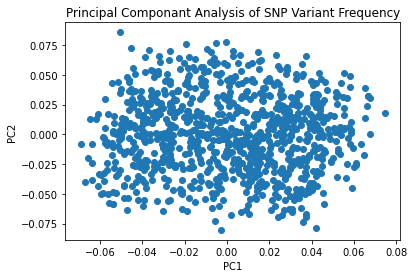

In [58]:
fig, ax = plt.subplots() #plot PCA

ax.set_title("Principal Componant Analysis of SNP Variant Frequency")
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.scatter(x = df_basefile [2], y = df_basefile [3])

## Part 2


In [124]:
%%bash
grep -v "##" /Users/cmdb/qbb2020-answers/QUANT2020/data/lab3/replace.vcf > freq.vcf #remove headers which start with ## leaving data and 

In [125]:
%%bash
head freq.vcf


#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	A01_01	A01_02	A01_03	A01_04	A01_05	A01_06	A01_07	A01_08	A01_09	A01_10	A01_11	A01_12	A01_13	A01_14	A01_15	A01_16	A01_17	A01_18	A01_19	A01_20	A01_21	A01_22	A01_23	A01_24	A01_25	A01_26	A01_27	A01_28	A01_29	A01_30	A01_31	A01_32	A01_33	A01_34	A01_35	A01_36	A01_37	A01_38	A01_39	A01_40	A01_41	A01_42	A01_43	A01_44	A01_45	A01_46	A01_47	A01_48	A01_49	A01_50	A01_51	A01_52	A01_53	A01_54	A01_55	A01_56	A01_57	A01_58	A01_59	A01_60	A01_61	A01_62	A01_63	A01_64	A01_65	A01_66	A01_67	A01_68	A01_69	A01_70	A01_71	A01_72	A01_73	A01_74	A01_75	A01_76	A01_77	A01_78	A01_79	A01_80	A01_81	A01_82	A01_83	A01_84	A01_85	A01_86	A01_87	A01_88	A01_89	A01_90	A01_91	A01_92	A01_93	A01_94	A01_95	A01_96	A02_01	A02_02	A02_03	A02_04	A02_05	A02_06	A02_07	A02_08	A02_09	A02_10	A02_11	A02_12	A02_13	A02_14	A02_15	A02_16	A02_17	A02_18	A02_19	A02_20	A02_21	A02_22	A02_23	A02_24	A02_25	A02_26	A02_27	A02_28	A02_29	A02_30	A02_31	A02_32	A02_33	A02_34	A02_35	A02_36	A02_37	A02_38	A02_39	A02_40	A0

In [91]:
freq = open('freq.vcf', 'r')

#parse freq file

freqs = freq.readlines() #data save
freq.close()
AF = []
allele_freq = [] #start gene quality list 
sub_list = []
for line in freqs: 
    if '#' in line: # skip header
        continue
    else:
        line = line.split()
        info = line[7]
        AF = info[3:-1]
        if len(AF) == 0:
            continue
        else:
            if ',' in AF:
                AF_spl = AF.split(',')
                for af in AF_spl:
                    af = float(af)
                    allele_freq.append(af)
            else:
                AF = float(AF)
                allele_freq.append(AF) # Append to list
print(allele_freq)

[0.6902, 0.71047, 0.56577, 0.50393, 0.71267, 0.7134, 0.6959, 0.49349, 0.4961, 0.521, 0.52956, 0.52458, 0.51883, 0.52252, 0.51903, 0.54036, 0.53652, 0.52807, 0.5259, 0.52212, 0.53037, 0.51525, 0.5369, 0.52575, 0.52824, 0.5303, 0.52783, 0.51957, 0.53785, 0.53287, 0.53096, 0.53444, 0.53174, 0.54248, 0.53312, 0.53803, 0.51952, 0.53343, 0.53202, 0.53377, 0.5371, 0.53, 0.52116, 0.52446, 0.52081, 0.52507, 0.52434, 0.53096, 0.52636, 0.53232, 0.5299, 0.5365, 0.527, 0.52482, 0.5207, 0.52085, 0.52794, 0.48148, 0.52009, 0.51886, 0.52197, 0.5235, 0.52402, 0.52489, 0.53232, 0.53141, 0.51773, 0.51625, 0.52056, 0.5197, 0.52058, 0.51576, 0.51976, 0.51344, 0.51402, 0.52087, 0.52605, 0.52764, 0.51633, 0.52432, 0.51967, 0.5233, 0.51481, 0.51718, 0.51473, 0.50958, 0.514, 0.51, 0.51598, 0.5176, 0.52, 0.51689, 0.51829, 0.53182, 0.52038, 0.52402, 0.52446, 0.52107, 0.51775, 0.52618, 0.52171, 0.53093, 0.54119, 0.53046, 0.52815, 0.5276, 0.5318, 0.53065, 0.53051, 0.52314, 0.52631, 0.52542, 0.522, 0.5154, 0.51994,

Text(0.5, 0, 'Allele Frequency')

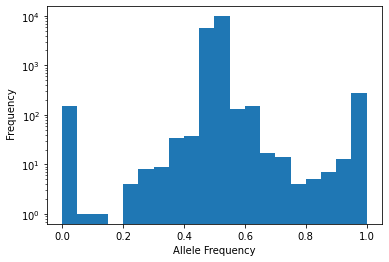

In [123]:
#plot freq
import matplotlib.pyplot as plt
import numpy as np
plt.hist(allele_freq, density=False, bins=20)  # `density=False` would make counts
plt.ylabel(' Frequency')
plt.yscale('log')
plt.xlabel('Allele Frequency')

## PART 3 - File correction done earlier

In [112]:
%%bash
plink \
  --vcf /Users/cmdb/qbb2020-answers/QUANT2020/data/lab3/replace.vcf \
  --pheno Data_For_Assignment/BYxRM_PhenoDataCHANGE.txt \
  --linear \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10 \
  --all-pheno

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno Data_For_Assignment/BYxRM_PhenoDataCHANGE.txt
  --vcf /Users/cmdb/qbb2020-answers/QUANT2020/data/lab3/replace.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1

## Part 4 - qbb/manhattan

In [117]:
%%bash
ls /Users/cmdb/qbb2020-answers/QUANT2020/data/lab3/


Data_For_Assignment
GS451_IC50.txt
Untitled.ipynb
freq.vcf
genotypes.vcf
gwas-empty.ipynb
gwas.ipynb
plink.Cadmium_Chloride.assoc.linear
plink.Caffeine.assoc.linear
plink.Calcium_Chloride.assoc.linear
plink.Cisplatin.assoc.linear
plink.Cobalt_Chloride.assoc.linear
plink.Congo_red.assoc.linear
plink.Copper.assoc.linear
plink.Cycloheximide.assoc.linear
plink.Diamide.assoc.linear
plink.E6_Berbamine.assoc.linear
plink.Ethanol.assoc.linear
plink.Formamide.assoc.linear
plink.Galactose.assoc.linear
plink.Hydrogen_Peroxide.assoc.linear
plink.Hydroquinone.assoc.linear
plink.Hydroxyurea.assoc.linear
plink.Indoleacetic_Acid.assoc.linear
plink.Lactate.assoc.linear
plink.Lactose.assoc.linear
plink.Lithium_Chloride.assoc.linear
plink.Magnesium_Chloride.assoc.linear
plink.Magnesium_Sulfate.assoc.linear
plink.Maltose.assoc.linear
plink.Mannose.assoc.linear
plink.Menadione.assoc.linear
plink.Neomycin.assoc.linear
plink.Paraquat.assoc.linear
plink.Raffinose.assoc.linear
plink.SDS.assoc.linear
plink.Sorb

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,1,.,1074,C,ADD,815,-0.05832,-0.5749,5.655000e-01,0.247567,0
1,1,.,1074,C,COV1,815,-0.24870,-0.1242,9.012000e-01,0.045179,1
2,1,.,1074,C,COV2,815,17.75000,8.8810,4.273000e-18,17.369267,2
3,1,.,1074,C,COV3,815,-1.39300,-0.6841,4.941000e-01,0.306185,3
4,1,.,1074,C,COV4,815,-2.57100,-1.2530,2.106000e-01,0.676542,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,16,.,942826,G,COV6,817,5.19900,2.5670,1.045000e-02,1.980884,182859
182860,16,.,942826,G,COV7,817,-6.58400,-3.2680,1.129000e-03,2.947306,182860
182861,16,.,942826,G,COV8,817,-10.44000,-5.1540,3.210000e-07,6.493495,182861
182862,16,.,942826,G,COV9,817,-0.43850,-0.2184,8.272000e-01,0.082389,182862


In [32]:
print(gwas)

        CHR SNP      BP A1   TEST  NMISS     BETA   STAT             P  \
0         1   .    1074  C    ADD    814   0.8414  2.653  8.126000e-03   
1         1   .    1074  C   COV1    814 -30.4700 -4.834  1.602000e-06   
2         1   .    1074  C   COV2    814   8.5060  1.354  1.761000e-01   
3         1   .    1074  C   COV3    814 -49.0900 -7.675  4.817000e-14   
4         1   .    1074  C   COV4    814  25.3100  3.945  8.668000e-05   
...     ...  ..     ... ..    ...    ...      ...    ...           ...   
182859   16   .  942826  G   COV6    819  -6.4890 -1.012  3.118000e-01   
182860   16   .  942826  G   COV7    819  28.6800  4.502  7.730000e-06   
182861   16   .  942826  G   COV8    819  10.6100  1.658  9.766000e-02   
182862   16   .  942826  G   COV9    819  -1.2700 -0.199  8.423000e-01   
182863   16   .  942826  G  COV10    819 -31.3600 -4.936  9.710000e-07   

             logP  snp_index  
0        2.090123          0  
1        5.795337          1  
2        0.754241 

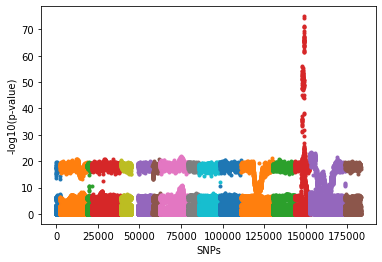

In [130]:
# split columns on any number of spaces

import matplotlib.pyplot as plt

gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots()

for chr in range(1, 23): 
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')

plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
    
plt.show()

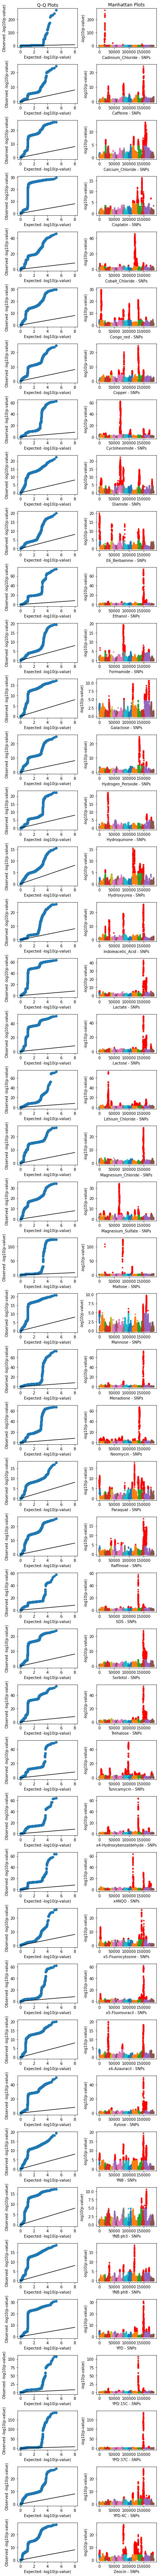

In [47]:
#import all needed programs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

Pheno = ["Cadmium_Chloride", "Caffeine", "Calcium_Chloride", "Cisplatin", "Cobalt_Chloride", "Congo_red", "Copper", "Cycloheximide", "Diamide", "E6_Berbamine", "Ethanol", "Formamide", "Galactose", "Hydrogen_Peroxide", "Hydroquinone", "Hydroxyurea", "Indoleacetic_Acid", "Lactate", "Lactose", "Lithium_Chloride", "Magnesium_Chloride", "Magnesium_Sulfate", "Maltose", "Mannose", "Menadione", "Neomycin", "Paraquat", "Raffinose", "SDS", "Sorbitol", "Trehalose", "Tunicamycin", "x4-Hydroxybenzaldehyde", "x4NQO", "x5-Fluorocytosine", "x5-Fluorouracil", "x6-Azauracil", "Xylose", "YNB", "YNB:ph3", "YNB:ph8", "YPD", "YPD:15C", "YPD:37C", "YPD:4C", "Zeocin"]
graphs = []
chromo = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,26]

fig, ax = plt.subplots(46, 2)
fig.set_figheight(96) 

ax[0][0].set_title("Q-Q Plots")
ax[0][1].set_title("Manhattan Plots")
for i in range(0, len(Pheno)):

    gwas = pd.read_csv("plink." + Pheno[i] + ".assoc.linear", sep = "\s+")

    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))


    for ch in range(0, len(chromo)): 
        ax[i][1].scatter(gwas["snp_index"][gwas["CHR"] == chromo[ch]][gwas["logP"] < 5][gwas["TEST"]=='ADD'], gwas["logP"][gwas["CHR"] == chromo[ch]][gwas["logP"] < 5][gwas["TEST"]=='ADD'], marker = '.')
        ax[i][1].scatter(gwas["snp_index"][gwas["CHR"] == chromo[ch]][gwas["logP"] >= 5][gwas["TEST"]=='ADD'], gwas["logP"][gwas["CHR"] == chromo[ch]][gwas["logP"] >= 5][gwas['TEST']=='ADD'], marker = '.', color ='red')
        

    ax[i][1].set_xlabel(Pheno[i] + " - SNPs")
    ax[i][1].set_ylabel("-log10(p-value)")


    gwas_sorted = gwas.sort_values(by = "P")


    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])

    gwas['snp_index'] = range(len(gwas))

    ax[i][0].scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax[i][0].plot([8,0], [8, 0], color = "black")


    ax[i][0].set_xlabel("Expected -log10(p-value)")
    ax[i][0].set_ylabel("Observed -log10(p-value)")

#end for loop
plt.tight_layout()
    
plt.show()

## Part 5

In [148]:
Cisplatin = pd.read_csv("plink.Cisplatin.assoc.linear", sep = "\s+")
Cisplatin['logP'] = -1 * np.log10(Cisplatin['P'])
Cisplatin['snp_index'] = range(len(Cisplatin))
Cisplatin.sort_values(by='logP', ascending=False, inplace = True)

In [149]:
Cisplatin.sort_values(by='logP', ascending=False, inplace = True)

In [150]:
Cisplatin

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
148612,14,.,413294,T,COV2,870,11.78,11.91,2.327000e-30,29.633204,148612
130396,13,.,34777,G,COV2,886,11.39,11.72,1.447000e-29,28.839531,130396
130561,13,.,39977,C,COV2,890,11.44,11.67,2.344000e-29,28.630042,130561
94756,10,.,513874,A,COV2,863,11.65,11.67,2.842000e-29,28.546376,94756
152363,15,.,12048,T,COV2,871,11.75,11.66,2.905000e-29,28.536854,152363
...,...,...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,836,NaN,NaN,NaN,NaN,182089
182090,16,.,890346,T,COV7,836,NaN,NaN,NaN,NaN,182090
182091,16,.,890346,T,COV8,836,NaN,NaN,NaN,NaN,182091
182092,16,.,890346,T,COV9,836,NaN,NaN,NaN,NaN,182092


In [151]:
common_snp = "413294"
common_chr = "XIV"

In [152]:
#take list of geno @ specific chr and BP
fs = open('Data_For_Assignment/BYxRM_segs_saccer3.bam.simplified.vcf', 'r')
f = open('Data_For_Assignment/BYxRM_PhenoDataCHANGE.txt', 'r')
genotypes = fs.readlines()
phenotypes = f.readlines()
fs.close()
f.close()

In [153]:
pheno_vals = [] #initiate a list
for line in phenotypes:
    if 'Cadmium_Chloride' in line: #skip header
        continue
    else: #
        pheno_vals.append((line.split()[4]))


In [155]:

count = 0
dicts = {'0/0':[],'0/1':[],'1/1':[],'./.':[]} #generate a dict


for line in genotypes: # go though each line
    if common_chr in line and common_snp in line: #if common snp in line
        
        genos = line.split('\t') #tab seperate
        genos = genos[9:-1] # take from column 9 to end of list

        for i in range(len(pheno_vals)): #loop though the number of phenotypes
            GT = genos[i].split(':') # split by :
            if pheno_vals[i] != 'NA': # if NA 
                dicts[GT[0]].append(float(pheno_vals[i]))
print(dicts)

{'0/0': [0.313118165836545, -0.563331259694695, 0.405203901198778, 0.53165360758293, 0.941181304275732, -1.11171058564048, -0.460481171249548, 0.030860180625652, -0.136827440426155, 0.979588333709987, -1.38289702129792, -0.432020431796143, 0.272710164472324, -0.209818145593042, -0.137839271690974, -0.878705603462563, 0.203854908542172, 0.144797085781453, -0.787338552189646, 0.88531841133242, 0.552385479870132, -0.673369388797968, 2.0941458784855, 0.232450882529196, -0.505871320820923, 0.218347803285114, -0.295152278380293, -1.65579746303654, 0.353901919209086, -0.453814085364722, -0.409619546902128, -0.43107004831926, -0.296707751206563, -0.130500388799772, 0.23804991005497, -0.975318513416108, 0.861233885122217, -0.948612103440316, -1.46105357478834, 1.50468852518878, 0.320981200496863, 0.752736230185218, 0.103877369656469, -1.20227908314347, -1.9796774431715, 0.484606607610875, 0.502677188305414, -0.531934519183065, 0.937102514492377, -0.821554158348336, 0.998416283145562, -0.1075287

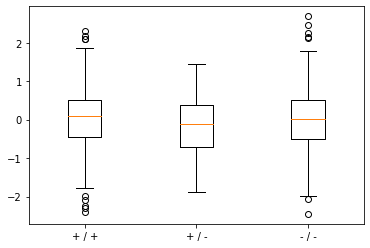

In [158]:
fig, ax = plt.subplots() #plot figure
data = list(dicts.values())
plt.boxplot(data[:3])

ax.set_xticklabels(["+ / +", "+ / -", "- / -"])
plt.show()

'#2ca02c'

In [157]:
%%bash
head -n 30 'Data_For_Assignment/BYxRM_PhenoData.txt'

	Cadmium_Chloride	Caffeine	Calcium_Chloride	Cisplatin	Cobalt_Chloride	Congo_red	Copper	Cycloheximide	Diamide	E6_Berbamine	Ethanol	Formamide	Galactose	Hydrogen_Peroxide	Hydroquinone	Hydroxyurea	Indoleacetic_Acid	Lactate	Lactose	Lithium_Chloride	Magnesium_Chloride	Magnesium_Sulfate	Maltose	Mannose	Menadione	Neomycin	Paraquat	Raffinose	SDS	Sorbitol	Trehalose	Tunicamycin	x4-Hydroxybenzaldehyde	x4NQO	x5-Fluorocytosine	x5-Fluorouracil	x6-Azauracil	Xylose	YNB	YNB:ph3	YNB:ph8	YPD	YPD:15C	YPD:37C	YPD:4C	Zeocin
A01_01	-7.32351970578731	0.279992827000249	0.313118165836545	1.65817907082079	-1.60444210190495	5.84161725611811	-4.13094977046224	0.821226166664529	3.62260156257758	-0.378746805086589	-0.6449544101999	0.736772421684145	1.46869950807288	4.25247880427656	-0.439429122584143	0.471260934436784	-0.502023574403563	-0.0196386553492135	-0.520403819717771	-3.04250228422253	-0.239535833991348	3.24339670861968	-3.94506679134117	2.13462934930907	2.02778180052776	-10.930132784538	1.5331378908103	-0.76